<a href="https://colab.research.google.com/github/Mobasshira/test-colab/blob/main/PAPER_CSC_OPTIMIZATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pulp
from pulp import*
import numpy as np
import matplotlib.pyplot as plt
#rnd=np.random
#rnd.seed(0)
C= {"car"} #2 types in main
I={'A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S'}
R={'AB','BC','CD','DE','EF','FG','GH','HI','IJ','JK','KL','LM','MN','NO','OP','PQ','QR','RS','SA'}    
w={'A':100,'B':55,'C':67,'D':50,'E':40,'F':20,'G':12,'H':30,'I':10,'J':80,'K':50,'L':22,'M':20,'N':60,'O':39,'P':78,'Q':22,'R':34,'S':56}
v={'A':30,'B':21,'C':25,'D':20,'E':12,'F':5,'G':3,'H':5,'I':2,'J':50,'K':32,'L':10,'M':2,'N':36,'O':9,'P':58,'Q':2,'R':4,'S':16}
d={'AB':1000,'BC':122,'CD':400,'DE':45,'EF':200,'FG':310,'GH':120,'HI':111,'IJ':123,'JK':321,'KL':222,'LM':567,'MN':57,'NO':654,'OP':876,'PQ':868,'QR':67,'RS':78,'SA':565}
capwc=415 #capacity weight
capvc=254 #capacity volume
vc=71 #speed
gc=0.15 #variable cost
capr=4.9  #recycling point capacity
capdp=98   #recycling point daily capacity
lf=10  #mechanical recycling loss factor
tfum=15 #time machine maintenance
hh=7   #daily work at recycling point
tvum=3   #machine time
cmu=30.47  #virgin plastic cost
cdpm=0 #delivery cost
cpu=0.88   #unit cost of plastic operation
lc=17   #labor cost
CM=250   #Amortization cost
pem=20   #emiited CO2 price
#CO2 emmition related data
qCO2d=4.229   
qCO2f=1.8   
qCO2t=99   
qCO2r=0.52   
#dij=7661
#wi=0.1
DP=30   
CM=0.15   
#simplifying for obj func
a=(1-(lf/100))*cmu+cdpm
b=(gc+(1/vc)*lc)
e=(cpu+tvum*lc)
f=(DP*tfum*lc)+CM
g= pem*(qCO2f +qCO2d )
h=qCO2r*pem
m=qCO2t*pem
n=0


#Define the objective functions

eco = pulp.LpProblem("eco", LpMaximize)
env = pulp.LpProblem("env", LpMaximize)
profit=pulp.LpProblem("profit", LpMaximize)

#Variables

x= LpVariable.dicts("x",[(i,j,r) for i in I for j in I for r in R ], 0,1,LpBinary)
PR=LpVariable.dicts("PR",[(i,r) for i in I for r in R], 0,1, LpBinary)
DR=LpVariable.dicts("DR",[(j,r) for j in I for r in R], 0,1, LpBinary)
U=LpVariable.dicts("U",[(i) for i in I],1,20,LpInteger)
DP=LpVariable('DP',1,30, cat='Integer')

#constrains

eco+=lpSum([PR[i,r] for i in I for r in R])<=1
env+=lpSum([PR[i,r] for i in I for r in R])<=1
profit+=lpSum([PR[i,r] for i in I for r in R])<=1

eco+=([DR[i,r] for i in I for r in R])==([PR[i,r]for i in I for r in R])
env+=([DR[i,r] for i in I for r in R])==([PR[i,r]for i in I for r in R])
profit+=([DR[i,r] for i in I for r in R])==([PR[i,r]for i in I for r in R])

eco+=lpSum([x[i,j,r] for i in I for j in I for r in R])==([PR[i,r]for i in I for r in R])
env+=lpSum([x[i,j,r] for i in I for j in I for r in R])==([PR[i,r]for i in I for r in R])
profit+=lpSum([x[i,j,r] for i in I for j in I for r in R])==([PR[i,r]for i in I for r in R])            

eco+=lpSum([x[i,j,r] for i in I for j in I for r in R])==([DR[i,r]for i in I for r in R])
env+=lpSum([x[i,j,r] for i in I for j in I for r in R])==([DR[i,r]for i in I for r in R])
profit+=lpSum([x[i,j,r] for i in I for j in I for r in R])==([DR[i,r]for i in I for r in R])            

eco+=lpSum([x[i,j,r] for i in I for j in I for r in R])<=1
env+=lpSum([x[i,j,r] for i in I for j in I for r in R])<=1
profit+=lpSum([x[i,j,r] for i in I for j in I for r in R])<=1            

eco+=lpSum([PR[i,r]*v[i] for i in I for r in R ])<=capvc
env+=lpSum([PR[i,r]*v[i] for i in I  for r in R])<=capvc
profit+=lpSum([PR[i,r]*v[i] for i in I  for r in R])<=capvc

eco+=lpSum([x[i,j,r]*d[r] for i in I for j in I for r in R ])<=hh*vc
env+=lpSum([x[i,j,r]*d[r] for i in I for j in I for r in R ])<=hh*vc
profit+=lpSum([x[i,j,r]*d[r] for i in I for j in I for r in R ])<=hh*vc

eco+=lpSum([PR[i,r]*w[i] for i in I for r in R])<=capr
env+=lpSum([PR[i,r]*w[i] for i in I for r in R])<=capr
profit+=lpSum([PR[i,r]*w[i] for i in I for r in R])<=capr

eco+=lpSum([PR[i,r]*w[i] for i in I for r in R])/capdp <=DP
env+=lpSum([PR[i,r]*w[i] for i in I for r in R ])/capdp<=DP
profit+=lpSum([PR[i,r]*w[i] for i in I for r in R ])/capdp<=DP

eco+=lpSum([PR[i,r]*w[i] for i in I for r in R])/capdp >=DP-1
env+=lpSum([PR[i,r]*w[i] for i in I for r in R])/capdp>=DP-1
profit+=lpSum([PR[i,r]*w[i] for i in I for r in R])/capdp>=DP-1

eco+=lpSum([U[i]-U[j]+x[i,j,r]*19 for i in I for j in I for r in R])<=18
env+=lpSum([U[i]-U[j]+x[i,j,r]*19 for i in I for j in I for r in R])<=18
profit+=lpSum([U[i]-U[j]+x[i,j,r]*19 for i in I for j in I for r in R])<=18

#obj function

eco+= lpSum([f+(a+e)*w[i]*PR[i,r] -b*x[i,j,r]*d[r] for i in I for j in I for r in R])
env+= lpSum([(g+m)*w[i]*PR[i,r]-h*x[i,j,r]*d[r] for i in I for j in I for r in R])

profit+= lpSum([f+(a+e+g+m)*w[i]*PR[i,r] -(b+h)*x[i,j,r]*d[r] for i in I for j in I for r in R])

#for optimal solution the output is 1

eco.solve()

env.solve()

profit.solve()

print("Status:", LpStatus[eco.status])

print("Status:", LpStatus[eco.status])

print("Status:", LpStatus[profit.status])

"""for v in eco.variables():
    if v.varValue>0:
        print(v.name,"=",v.varValue)
for v in env.variables():
    if v.varValue>0:
        print(v.name,"=",v.varValue)"""


for v in profit.variables():
    if v.varValue>0:
        print(v.name,"=",v.varValue)

##Days of collection=1
##Routes were A,B,C,D


print("Economic profit  =",value(eco.objective))
print("Environmental profit =",value(env.objective))
print("Total profit =",value(profit.objective))

Eco= value(eco.objective)
Env =value(env.objective)
Profit=Eco+Env
print("Total Profit=", Profit)


Status: Optimal
Status: Optimal
Status: Optimal
DP = 1.0
U_A = 1.0
U_B = 1.0
U_C = 1.0
U_D = 1.0
U_E = 1.0
U_F = 1.0
U_G = 1.0
U_H = 1.0
U_I = 1.0
U_J = 1.0
U_K = 1.0
U_L = 1.0
U_M = 1.0
U_N = 1.0
U_O = 1.0
U_P = 1.0
U_Q = 1.0
U_R = 1.0
U_S = 1.0
Economic profit  = 52472378.849993624
Environmental profit = 0.0
Total profit = 52472378.849993624
Total Profit= 52472378.849993624


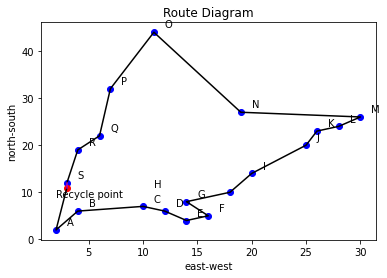

In [14]:
#VISUAL PRESENTATION
#for below route the fesibility was considered
rnd=np.random
rnd.seed(0)
loc_x = rnd.rand (len(I))*200
loc_y = rnd.rand (len(I))*100
Loc=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S']
XO=[3]
YO=[11]
X=[2,4,10,12,14,16,14,18,20,25,26,28,30,19,11,7,6,4,3]
Y=[2,6,7,6,4,5,8,10,14,20,23,24,26,27,44,32,22,19,12]
Xall=XO+X
Yall=YO+Y
Xreturn=XO+[3]
Yreturn=YO+[12]
plt.annotate("Recycle point", (3-1, 11-2))
plt.annotate("A", (2+1, 2+1))
plt.annotate("B", (4+1, 6+1))
plt.annotate("C", (10+1, 7+1))
plt.annotate("D", (12+1, 6+1))
plt.annotate("E", (14+1, 4+1))
plt.annotate("F", (16+1, 5+1))
plt.annotate("G", (14+1, 8+1))
plt.annotate("H", (10+1, 10+1))
plt.annotate("I", (20+1, 14+1))
plt.annotate("J", (25+1, 20+1))
plt.annotate("K", (26+1, 23+1))
plt.annotate("L", (28+1, 24+1))
plt.annotate("M", (30+1, 26+1))
plt.annotate("N", (19+1,27+1))
plt.annotate("O", (11+1, 44+1))
plt.annotate("P", (7+1, 32+1))
plt.annotate("Q", (6+1,22+1))
plt.annotate("R", (4+1, 19+1))
plt.annotate("S", (3+1,12+1))
plt.scatter(X,Y, c='b')
plt.scatter(XO,YO, c='r')
plt.plot(Xall,Yall, c='k')
plt.plot(Xreturn,Yreturn, c='m')
plt.title("Route Diagram", fontdict=None, loc='center', pad=None)
plt.xlabel("east-west")
plt.ylabel("north-south")
plt.show()

